In [1]:
# Script Name: EDA of Hotel Reviews Data
# Author: Rahul Kumar
# Date: 2-Jan-20
# Description: The purpose is to clean up data in preperation for Model running

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import scipy as sp
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

#this supposedly extracts country from a text line
import pycountry

import matplotlib.pyplot as plt
%matplotlib inline

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
hotels = pd.read_csv('../Hotel_Reviews.csv')
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
# Initially do the usual shape stuff I guess. 
hotels.shape

(515738, 17)

In [4]:
# Check the data types for any odd onces
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [5]:
# Look for missing null values
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [6]:
# Get average stats using describe. Not really sure how useful this was
hotels.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [7]:
# The number of hotels and the number of reviews they have.
hotels.groupby('Hotel_Name').mean()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,
11 Cadogan Gardens,101.000000,8.700000,15.528302,393.000000,19.974843,7.226415,8.845283,51.493616,-0.159235
1K Hotel,69.000000,7.700000,24.932432,663.000000,15.601351,9.141892,7.861486,48.863932,2.365874
25hours Hotel beim MuseumsQuartier,391.000000,8.800000,16.161103,4324.000000,21.911466,8.722787,8.983309,48.206474,16.354630
41,66.000000,9.600000,8.883495,244.000000,25.300971,6.009709,9.711650,51.498147,-0.143649
45 Park Lane Dorchester Collection,27.000000,9.400000,6.750000,68.000000,11.535714,7.214286,9.603571,51.506371,-0.151536
88 Studios,197.000000,8.400000,23.936819,955.000000,21.464052,7.427015,8.489107,51.499279,-0.209073
9Hotel Republique,100.000000,8.800000,16.950820,857.000000,19.338798,8.633880,8.743716,48.870842,2.360586
A La Villa Madame,24.000000,8.800000,8.463415,185.000000,19.634146,5.829268,8.853659,48.848861,2.331526
ABaC Restaurant Hotel Barcelona GL Monumento,10.000000,8.800000,35.225806,111.000000,18.677419,10.258065,8.464516,41.410694,2.136294


In [8]:
# Value Count for the Hotel Names. This would give an idea, perhaps to see if 
# a place has less than a certain number of reviews we can ignore it perhaps
hotels.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf                      4789
Strand Palace Hotel                                             4256
Park Plaza Westminster Bridge London                            4169
Copthorne Tara Hotel London Kensington                          3578
DoubleTree by Hilton Hotel London Tower of London               3212
Grand Royale London Hyde Park                                   2958
Holiday Inn London Kensington                                   2768
Hilton London Metropole                                         2628
Millennium Gloucester Hotel London                              2565
Intercontinental London The O2                                  2551
Park Grand Paddington Court                                     2288
Hilton London Wembley                                           2227
Park Plaza County Hall London                                   2223
Blakemore Hyde Park                                             2178
Park Plaza London Riverbank       

In [9]:
# There is a lot of Data here, perhaps a little too much. Especially for the time scope I have. So I will be removing Hotels
# Value Counts Less than < 149. This will probably affect the prediction, but I feel in the grand scheme of the actualy data,
# I don't think it will bring too many changes.

# I found this online that helps clear a dataframe based on minimum frequency occurance
def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    """Filters the DataFrame based on the value frequency in the specified column.

    :param df: DataFrame to be filtered.
    :param column: Column name that should be frequency filtered.
    :param min_freq: Minimal value frequency for the row to be accepted.
    :return: Frequency filtered DataFrame.
    """
    # Frequencies of each value in the column.
    freq = df[column].value_counts()
    # Select frequent values. Value is in the index.
    frequent_values = freq[freq >= min_freq].index
    # Return only rows with value frequency above threshold.
    return df[df[column].isin(frequent_values)]

In [10]:
# Overwriting it.

hotels = filter_by_freq(hotels,'Hotel_Name', 150)

In [11]:
# Checking to see if the data set has been reduced

hotels.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf                4789
Strand Palace Hotel                                       4256
Park Plaza Westminster Bridge London                      4169
Copthorne Tara Hotel London Kensington                    3578
DoubleTree by Hilton Hotel London Tower of London         3212
Grand Royale London Hyde Park                             2958
Holiday Inn London Kensington                             2768
Hilton London Metropole                                   2628
Millennium Gloucester Hotel London                        2565
Intercontinental London The O2                            2551
Park Grand Paddington Court                               2288
Hilton London Wembley                                     2227
Park Plaza County Hall London                             2223
Blakemore Hyde Park                                       2178
Park Plaza London Riverbank                               2167
M by Montcalm Shoreditch London Tech City              

In [12]:
hotels.shape

(466868, 17)

Text(0.5, 1.0, 'Nationality vs Review Count')

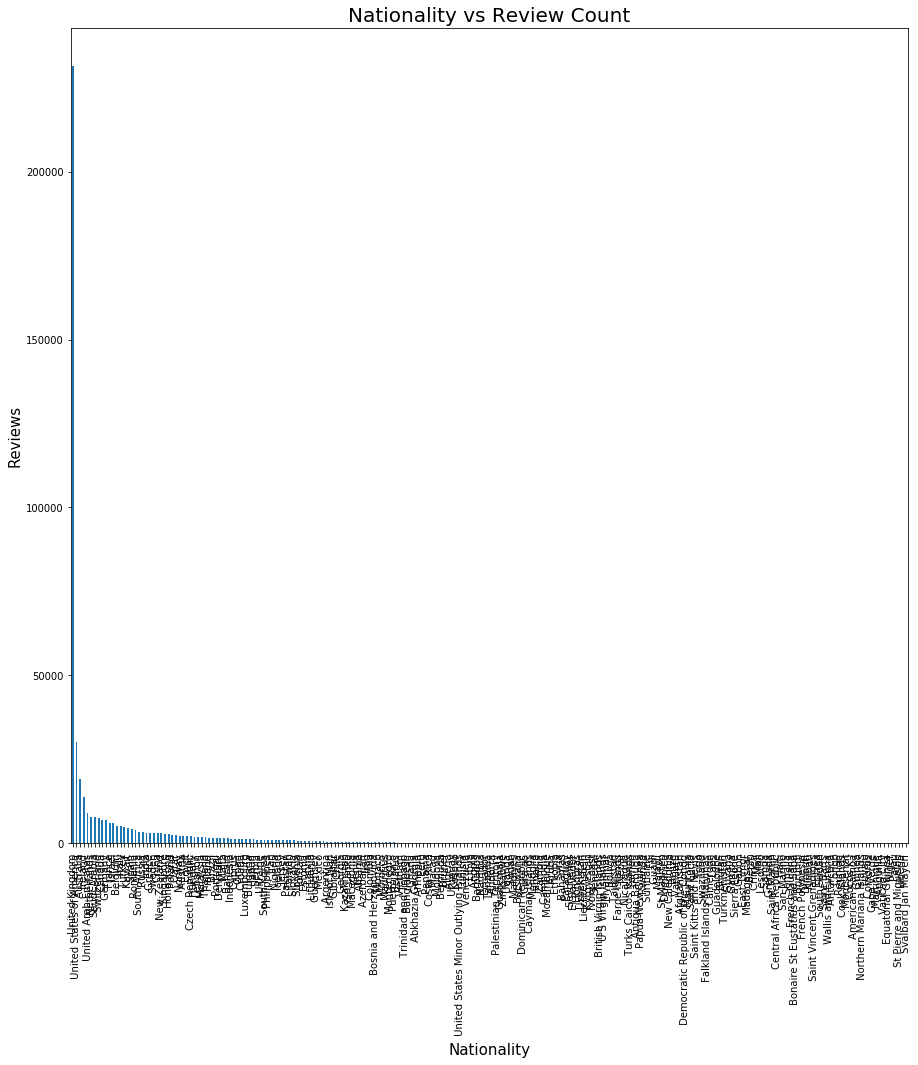

In [13]:
plt.figure(figsize=(15,15))

#Value Counts for Reviewer Nationality, as if the nationality is rare, we won't really get any meaningful information from it
hotels.Reviewer_Nationality.value_counts().plot.bar()

plt.xlabel('Nationality',fontsize=15)
plt.ylabel('Reviews',fontsize=15)
plt.title('Nationality vs Review Count',fontsize=20)

# The graph doesn't help much

In [14]:
# Lets split up the address and obtain the location of each hotel. without using the lat lon as there are values clearly
# missing from it.

# new dataframe

hotel_address = hotels[['Hotel_Address']]
hotel_address.head()

,Hotel_Address
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...


In [15]:
hotel_address['Hotel_Address'][50000]
#This was just checking to see if the data has the country in the address. It seems to be the last Word, Unless the country has
#a long name like United Kingdom

'140 Gloucester Road Kensington and Chelsea London SW7 4QH United Kingdom'

# PyCountry
Found a package known as PyCountry, which reads a string and extracts the country, if there is one, from it. I am quickly testing it to see if it works as intended.

In [16]:
text = "140 Gloucester Road Kensington and Chelsea London SW7 4QH United Kingdom"
for country in pycountry.countries:
    if country.name in text:
        print(country.name)

United Kingdom


It's great the pycountry package works pretty well.

In [17]:
# Have a quick function that returns the Country
def country_txt(text):
    for country in pycountry.countries:
        if country.name in text:
            return country.name

In [18]:
# I used the apply method to apply the above function to each row
hotels['Country'] = hotels['Hotel_Address'].apply(country_txt)
hotels.head(30)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968,Netherlands
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968,Netherlands
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968,Netherlands
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968,Netherlands
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968,Netherlands


In [19]:
# Check the Type of the Hotel once again.
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
Country                                        object
dtype: object

In [20]:
# Look for missing null values
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


Text(0.5, 1.0, 'Number of Hotels in a Country')

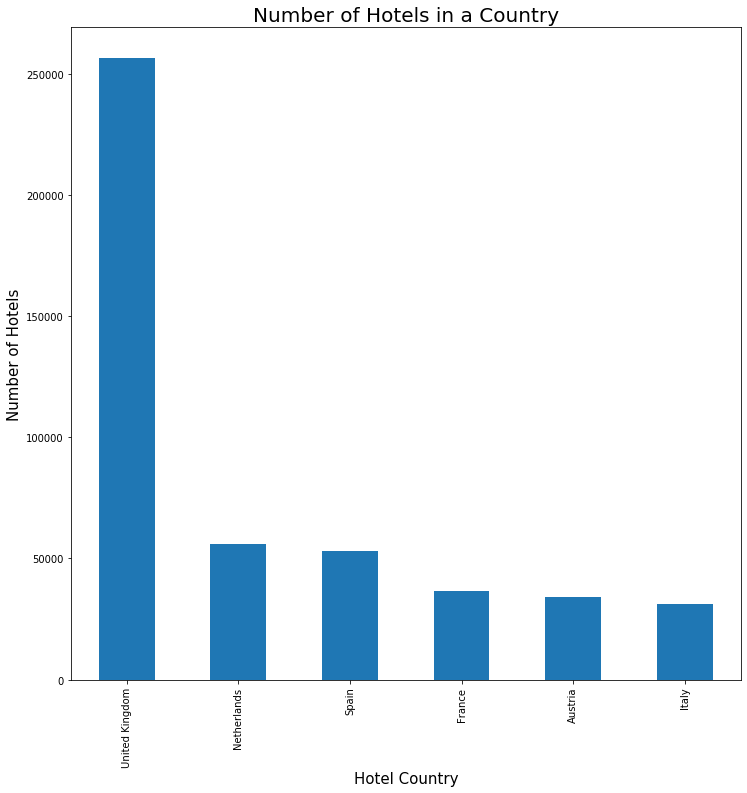

In [21]:
# The Lat and Lng at the moment dont seem to have much use, especially since it has a large amount of null values. The address
# has given us the general country of each hotel.

# Value Count for the Country.
plt.figure(figsize=(12,12))

#Value Counts for Reviewer Nationality, as if the nationality is rare, we won't really get any meaningful information from it
hotels.Country.value_counts().plot.bar()

plt.xlabel('Hotel Country',fontsize=15)
plt.ylabel('Number of Hotels',fontsize=15)
plt.title('Number of Hotels in a Country',fontsize=20)

# The graph doesn't help much

In [22]:
# At the moment, I can't see much use to the latitude and longitude when I have the address
hotels.drop(['lat', 'lng'], axis=1,inplace=True)
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
Country                                        object
dtype: object

In [23]:
#Change Review Date to Datetime type
hotels['Review_Date'] = pd.to_datetime(hotels['Review_Date'])
hotels.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
Country                                               object
dtype: object

In [24]:
# Run the Sns Pairplot. Currently Commented because it takes bloody ages to run.
#sns.pairplot(hotels)

<Figure size 432x288 with 0 Axes>

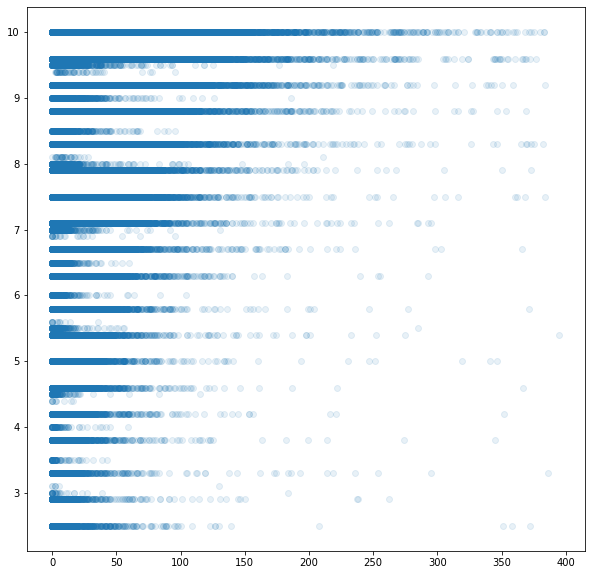

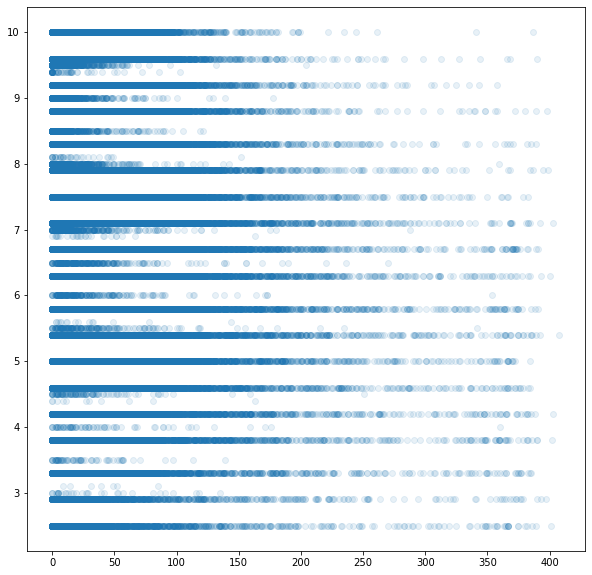

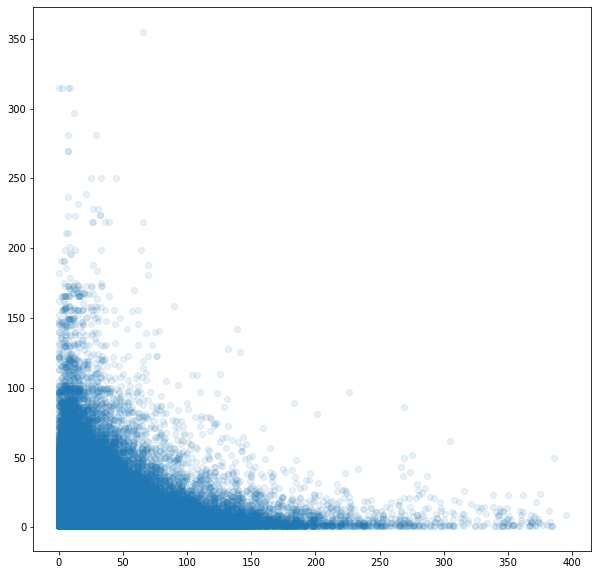

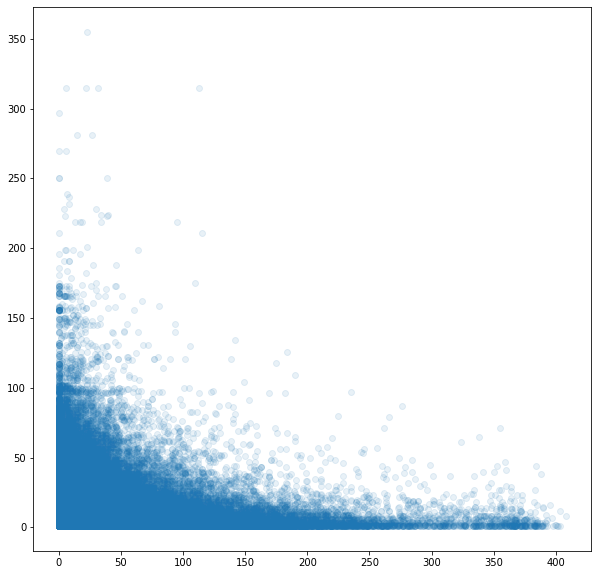

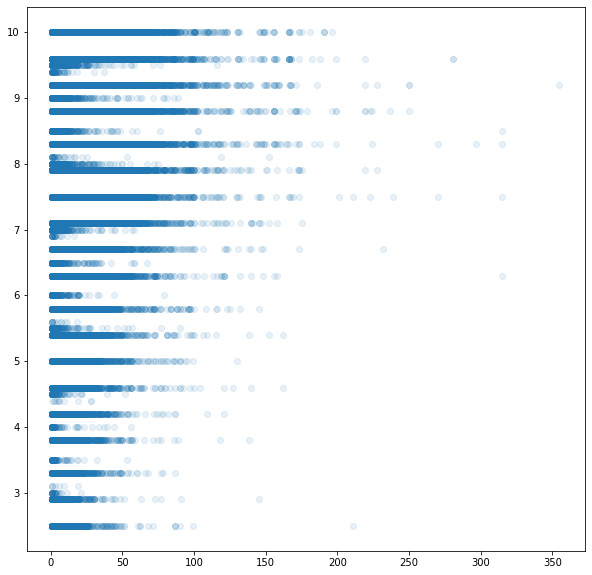

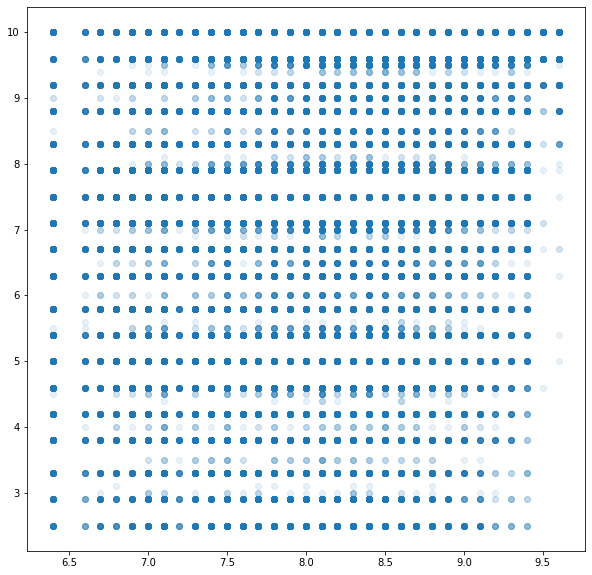

In [25]:
# Looking at relationships between word count and review score

plt.figure(0)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Review_Total_Positive_Word_Counts, hotels.Reviewer_Score,alpha=0.1)

plt.figure(1)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Review_Total_Negative_Word_Counts, hotels.Reviewer_Score,alpha=0.1)

plt.figure(2)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Review_Total_Positive_Word_Counts, hotels.Total_Number_of_Reviews_Reviewer_Has_Given,alpha=0.1)

plt.figure(3)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Review_Total_Negative_Word_Counts, hotels.Total_Number_of_Reviews_Reviewer_Has_Given,alpha=0.1)

plt.figure(4)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Total_Number_of_Reviews_Reviewer_Has_Given, hotels.Reviewer_Score,alpha=0.1)

plt.figure(5)
plt.figure(figsize=(10,10))
plt.scatter(hotels.Average_Score, hotels.Reviewer_Score,alpha=0.1)

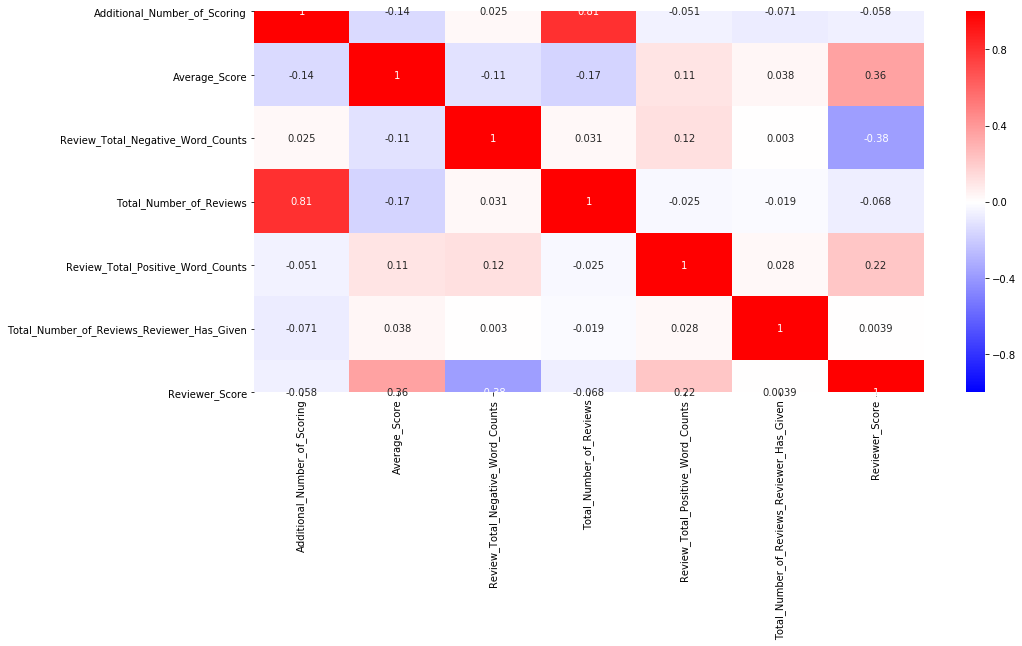

In [26]:
# Figured why not make a heatmap, its a lot more clearer than the sns pairplot, especially considering how much data 
# there actually is

# Make a heatmap on the correlations between variables in the hotel data:
hotels_correlations = hotels.corr()
hotels_correlations
plt.figure(figsize=(15,7))
sns.heatmap(hotels_correlations, vmin = -1, vmax = 1, cmap = 'bwr', annot=True);

# Yeah this is way more clearer

In [27]:
# Somemore feature engineering especially with the Tags.
hotels.Tags[0]

"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"

In [28]:
# Determine what type of data it is. Looks like a string to be honest
type(hotels.Tags[0])

str

In [29]:
# Was correct It is a string. So now the next step is to covert it into a list. Using the previous homework function I made.

def string_split(string):
    return list(string.split(","))

hotels['Tags'] = hotels.Tags.apply(string_split)
hotels['Tags_list_length'] = hotels.Tags.apply(lambda x: len(x))
hotels.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Country,Tags_list_length
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[[' Leisure trip ', ' Family with young child...",3 days,Netherlands,5
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[[' Leisure trip ', ' Solo traveler ', ' Dup...",3 days,Netherlands,4
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[[' Leisure trip ', ' Couple ', ' Suite ', ...",10 days,Netherlands,5


In [30]:
# Now to find out the most tags in a list. This is easily done by Value_Counts

hotels.Tags_list_length.value_counts()

5    271008
4    190148
3      4994
6       636
2        76
1         6
Name: Tags_list_length, dtype: int64

In [31]:
# We know that at most there are 6 Tags. So We create a column that will have each tag
hotels[['Tag_1','Tag_2','Tag_3','Tag_4','Tag_5','Tag_6']] = pd.DataFrame(hotels.Tags.values.tolist(), index= hotels.index)
hotels.head(50)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Country,Tags_list_length,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 6 nights '],None,None
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 4 nights '],None,None
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[[' Leisure trip ', ' Family with young child...",3 days,Netherlands,5,[' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',' Submitted from a mobile device '],None
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[[' Leisure trip ', ' Solo traveler ', ' Dup...",3 days,Netherlands,4,[' Leisure trip ',' Solo traveler ',' Duplex Double Room ',' Stayed 3 nights '],None,None
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[[' Leisure trip ', ' Couple ', ' Suite ', ...",10 days,Netherlands,5,[' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',' Submitted from a mobile device '],None
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[[' Leisure trip ', ' Group ', ' Duplex Doub...",10 days,Netherlands,4,[' Leisure trip ',' Group ',' Duplex Double Room ',' Stayed 1 night '],None,None
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[[' Leisure trip ', ' Group ', ' Duplex Twin...",17 days,Netherlands,5,[' Leisure trip ',' Group ',' Duplex Twin Room ',' Stayed 5 nights ',' Submitted from a mobile device '],None
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",17 days,Netherlands,5,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 2 nights ',' Submitted from a mobile device '],None
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",25 days,Netherlands,5,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 1 night ',' Submitted from a mobile device '],None
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[[' Leisure trip ', ' Couple ', ' Large King...",26 days,Netherlands,4,[' Leisure 

In [32]:
# Now to Clean up each of the Tags.                               
def string_clean(word):
    if word is None:
        return None
    else:
        word = word.replace("\'", '') #This gets rid of all ', which might make some names weird. but this saves making a 
                                    # a seperate function. perhaps an If statement might work
        word = word.replace("[", '')
        word = word.replace("]", '')
        word = word
        if word[0] == " " and word[1] == " ":
            word = word[2:]
        elif word[0] == " ":
            word = word[1:]
        word = word[:-1] #Removes Space at the end :c
        return word

In [33]:
hotels['Tag_1'] = hotels.Tag_1.apply(string_clean)
hotels['Tag_2'] = hotels.Tag_2.apply(string_clean)
hotels['Tag_3'] = hotels.Tag_3.apply(string_clean)
hotels['Tag_4'] = hotels.Tag_4.apply(string_clean)
hotels['Tag_5'] = hotels.Tag_5.apply(string_clean)
hotels['Tag_6'] = hotels.Tag_6.apply(string_clean)

In [34]:
# This is to check all the Tags. How many there are, what categories I need to create. Chances are there will be thousands.
# I will have to 
# Create some new dataframes

Tag1 = hotels[['Tag_1']]
Tag2 = hotels[['Tag_2']]
Tag3 = hotels[['Tag_3']]
Tag4 = hotels[['Tag_4']]
Tag5 = hotels[['Tag_5']]
Tag6 = hotels[['Tag_6']]

# Rename them. 
Tag1.rename(columns={'Tag_1':'Tag'}, inplace=True)
Tag2.rename(columns={'Tag_2':'Tag'}, inplace=True)
Tag3.rename(columns={'Tag_3':'Tag'}, inplace=True)
Tag4.rename(columns={'Tag_4':'Tag'}, inplace=True)
Tag5.rename(columns={'Tag_5':'Tag'}, inplace=True)
Tag6.rename(columns={'Tag_6':'Tag'}, inplace=True)

# Convert into a single list/dataframe
Tag = pd.concat([Tag1, Tag2, Tag3, Tag4, Tag5, Tag6], ignore_index=True)
Tag.head(50)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Tag
0,Leisure trip
1,Leisure trip
2,Leisure trip
3,Leisure trip
4,Leisure trip
5,Leisure trip
6,Leisure trip
7,Leisure trip
8,Leisure trip
9,Leisure trip


In [35]:
# Check the size
Tag.size

2801208

In [36]:
# Do a value_count
Tag.Tag.value_counts()

Leisure trip                                                                                            379305
Submitted from a mobile device                                                                          279983
Couple                                                                                                  229041
Stayed 1 night                                                                                          180344
Stayed 2 nights                                                                                         120918
Solo traveler                                                                                            97090
Stayed 3 nights                                                                                          84725
Business trip                                                                                            73884
Group                                                                                                    59951
F

## Category Types
Now looking at the list above, there seems to be an excessive amount of tags. Most of them are just room descriptions. As important as room types could be in a review, in this project it will probably ignored. The Tags that will be looked at are:

- None Values(No Tag)/Submitted from a mobile device/Stayed - 0 (As they dont bring info or are feature columns already)
- Leisure Trip - 1
- Couple - 2
- Solo Traveler - 3
- Business Trip - 4
- Group - 5
- Family - Young or Old - 6
- Other - 7

### Potential Feature Columns

One thing to note are the potential feature column from the Tags are how long the stay was for. As some tags are Stayed for X nights


In [37]:
# Assign values to each of the categories

def category(tagg):
    if tagg is None:
        return 0
    elif tagg == 'Leisure trip':
        return 1
    elif tagg == 'Couple':
        return 2
    elif tagg == 'Solo traveler':
        return 3
    elif tagg == 'Business trip':
        return 4
    elif tagg == 'Group' or tagg =='Travelers with friends':
        return 5
    elif tagg == 'Family with young children' or tagg == 'Family with older children':
        return 6
    elif tagg[0:5] == 'Stayed':
        return 0
    elif tagg == 'Submitted from a mobile device':
        return 0
    else:
        return 7
        

In [38]:
category('Leisure trip')

1

In [39]:
x = Tag.Tag.apply(category)

In [40]:
x.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    4
12    1
13    4
14    1
15    1
16    1
17    1
18    4
19    1
Name: Tag, dtype: int64

In [41]:
# Now I need to create a new row that has the number of nights stayed by a reviewer. This is done by looking at the Tags column
# in the hotel data. Which is now unfortunately a list, so I need it back as a string.

def backtostring(lst):
    standin = ""
    string = standin.join(lst)
    return string


In [42]:
hotels['Tags_String'] = hotels.Tags.apply(backtostring)

In [43]:
# Now that it is a string. Extract out the number of Nights stayed, if they do have one. This is done by searching for the
# position of the word Stayed and Nights. Then shorten the string to the Stayed x nights and then remove the integer from that.
# Check to also see if it occurs or not, and if fails, return null value

def stayed_night(string):
    x = string.find('Stayed')
    y = string.find('nights')
    string = string[x:y+6]
    # Found this online, creates a list of integers in a string.
    res = [int(i) for i in string.split() if i.isdigit()] 
    if len(res) == 0:
        stayed = None
    else:
        stayed = res[0]
        
    return stayed



In [44]:
hotels['Trip_Duration'] = hotels.Tags_String.apply(stayed_night)
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Country,Tags_list_length,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tags_String,Trip_Duration
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,Leisure trip,Couple,Duplex Double Room,Stayed 6 nights,None,None,[' Leisure trip ' ' Couple ' ' Duplex Double R...,6.0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,Leisure trip,Couple,Duplex Double Room,Stayed 4 nights,None,None,[' Leisure trip ' ' Couple ' ' Duplex Double R...,4.0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[[' Leisure trip ', ' Family with young child...",3 days,Netherlands,5,Leisure trip,Family with young children,Duplex Double Room,Stayed 3 nights,Submitted from a mobile device,None,[' Leisure trip ' ' Family with young children...,3.0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[[' Leisure trip ', ' Solo traveler ', ' Dup...",3 days,Netherlands,4,Leisure trip,Solo traveler,Duplex Double Room,Stayed 3 nights,None,None,[' Leisure trip ' ' Solo traveler ' ' Duplex D...,3.0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[[' Leisure trip ', ' Couple ', ' Suite ', ...",10 days,Netherlands,5,Leisure trip,Couple,Suite,Stayed 2 nights,Submitted from a mobile device,None,[' Leisure trip ' ' Couple ' ' Suite ' ' Staye...,2.0


In [45]:
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [46]:

# Apply each of the category
hotels['Tag_1'] = hotels.Tag_1.apply(category)
hotels['Tag_2'] = hotels.Tag_2.apply(category)
hotels['Tag_3'] = hotels.Tag_3.apply(category)
hotels['Tag_4'] = hotels.Tag_4.apply(category)
hotels['Tag_5'] = hotels.Tag_5.apply(category)
hotels['Tag_6'] = hotels.Tag_6.apply(category)

In [47]:
hotels.isnull().sum().to_frame()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [48]:
hotels.Reviewer_Nationality.value_counts()

 United Kingdom                           231366
 United States of America                  30150
 Australia                                 19129
 Ireland                                   13838
 United Arab Emirates                       8828
 Netherlands                                7631
 Saudi Arabia                               7614
 Switzerland                                7436
 Canada                                     6968
 Germany                                    6821
 France                                     6116
 Israel                                     5863
 Belgium                                    5178
 Italy                                      5177
 Turkey                                     4704
 Kuwait                                     4452
 Spain                                      4125
 Romania                                    3925
 South Africa                               3400
 Russia                                     3269
 India              

In [49]:
hotels.Reviewer_Nationality[0]

' Russia '

In [50]:
hotels.loc[hotels.Reviewer_Nationality == ' United Kingdom ', 'Reviewer_Nationality'].count()

231366

In [51]:
# Realised Revier Nationality has space in front and back
# Now to Clean up each of the Tags.                               
def string_clean2(word):
    if word is None:
        return None
    else:
        if word[0] == " ":
            word = word[1:]
        word = word[:-1] #Removes Space at the end :c
        return word

hotels['Reviewer_Nationality'] = hotels.Reviewer_Nationality.apply(string_clean2)

In [52]:
hotels.Reviewer_Nationality[0]

'Russia'

In [53]:
hotels.loc[hotels.Reviewer_Nationality == 'United Kingdom', 'Reviewer_Nationality'].count()

231366

In [54]:
# Instantly Categorise based on Unique values. Maybe for a second run, do it for Tags :/
hotels['RNC'] = pd.factorize(hotels['Reviewer_Nationality'])[0] + 1
hotels.head(100)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Country,Tags_list_length,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tags_String,Trip_Duration,RNC
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,6.0,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,4.0,2
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[[' Leisure trip ', ' Family with young child...",3 days,Netherlands,5,1,6,7,7,0,0,[' Leisure trip ' ' Family with young children...,3.0,3
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[[' Leisure trip ', ' Solo traveler ', ' Dup...",3 days,Netherlands,4,1,3,7,7,0,0,[' Leisure trip ' ' Solo traveler ' ' Duplex D...,3.0,4
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[[' Leisure trip ', ' Couple ', ' Suite ', ...",10 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Suite ' ' Staye...,2.0,5
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[[' Leisure trip ', ' Group ', ' Duplex Doub...",10 days,Netherlands,4,1,5,7,7,0,0,[' Leisure trip ' ' Group ' ' Duplex Double Ro...,NaN,6
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[[' Leisure trip ', ' Group ', ' Duplex Twin...",17 days,Netherlands,5,1,5,7,7,0,0,[' Leisure trip ' ' Group ' ' Duplex Twin Room...,5.0,4
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",17 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,2.0,4
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",25 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,NaN,7
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[[' Leisure trip ', ' Couple ', ' Large King...",26 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Large King Room...,7.0,8


In [55]:
hotels['Country_Code'] = pd.factorize(hotels['Country'])[0] + 1
hotels.head(100)

## Try and use this next run through
#from sklearn.preprocessing import LabelEncoder

#LE = LabelEncoder()
#df['code'] = LE.fit_transform(df['cc'])

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Country,Tags_list_length,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tags_String,Trip_Duration,RNC,Country_Code
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,6.0,1,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",0 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,4.0,2,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[[' Leisure trip ', ' Family with young child...",3 days,Netherlands,5,1,6,7,7,0,0,[' Leisure trip ' ' Family with young children...,3.0,3,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[[' Leisure trip ', ' Solo traveler ', ' Dup...",3 days,Netherlands,4,1,3,7,7,0,0,[' Leisure trip ' ' Solo traveler ' ' Duplex D...,3.0,4,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[[' Leisure trip ', ' Couple ', ' Suite ', ...",10 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Suite ' ' Staye...,2.0,5,1
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[[' Leisure trip ', ' Group ', ' Duplex Doub...",10 days,Netherlands,4,1,5,7,7,0,0,[' Leisure trip ' ' Group ' ' Duplex Double Ro...,NaN,6,1
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[[' Leisure trip ', ' Group ', ' Duplex Twin...",17 days,Netherlands,5,1,5,7,7,0,0,[' Leisure trip ' ' Group ' ' Duplex Twin Room...,5.0,4,1
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",17 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,2.0,4,1
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[[' Leisure trip ', ' Couple ', ' Duplex Dou...",25 days,Netherlands,5,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Duplex Double R...,NaN,7,1
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[[' Leisure trip ', ' Couple ', ' Large King...",26 days,Netherlands,4,1,2,7,7,0,0,[' Leisure trip ' ' Couple ' ' Large King Room...,7.0,8,1


In [56]:
type(hotels.Reviewer_Score[0])

numpy.float64

### The Feature columns

The Feature columns for Prediction will be

- Reviewer Nationality
- Negative Review
- Positive Review
- Tags 1 to 6
- Country
- Trip Duration

The predicted value will be the Reviewer Score.


## Modelling

In [57]:
list(hotels)

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'Country',
 'Tags_list_length',
 'Tag_1',
 'Tag_2',
 'Tag_3',
 'Tag_4',
 'Tag_5',
 'Tag_6',
 'Tags_String',
 'Trip_Duration',
 'RNC',
 'Country_Code']

### Preliminary Modeling with Linear Regression and Knn Classification

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

### Linear Regression

In [59]:
feature_cols = ['RNC','Total_Number_of_Reviews_Reviewer_Has_Given',
                'Country_Code','Tag_1','Tag_2','Tag_3','Tag_4','Tag_5','Tag_6', 'Trip_Duration']
feature_cols

['RNC',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Country_Code',
 'Tag_1',
 'Tag_2',
 'Tag_3',
 'Tag_4',
 'Tag_5',
 'Tag_6',
 'Trip_Duration']

In [60]:
# To keep things simple for Linear Regression. I dropped any reviews that didn't specify a Duration Stayed
H = hotels[['RNC','Total_Number_of_Reviews_Reviewer_Has_Given',
                'Country_Code','Tag_1','Tag_2','Tag_3','Tag_4','Tag_5','Tag_6', 'Trip_Duration', 'Reviewer_Score']]
H.shape

(466868, 11)

In [61]:
H.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
X = H[feature_cols]
y = H['Reviewer_Score']

In [63]:
X.shape

(286345, 10)

In [64]:
y.shape

(286345,)

In [65]:
X.dtypes

RNC                                             int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Country_Code                                    int64
Tag_1                                           int64
Tag_2                                           int64
Tag_3                                           int64
Tag_4                                           int64
Tag_5                                           int64
Tag_6                                           int64
Trip_Duration                                 float64
dtype: object

In [66]:
y.dtypes

dtype('float64')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [68]:
X_train.shape

(214758, 10)

In [69]:
# Null Prediction Values
# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_train.mean())
y_null

array([8.36667738, 8.36667738, 8.36667738, ..., 8.36667738, 8.36667738,
       8.36667738])

In [70]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.6136494531376548

In [71]:
# Train the Linear Regression Model
linreg = LinearRegression()

linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

8.833357291114863
[-0.00466304  0.00267861  0.05299543 -0.1641658  -0.0326342   0.00483407
 -0.03041067  0.11498682  0.         -0.00723134]


In [72]:
# Predict using test set
y_pred = linreg.predict(X_test)

In [73]:
# Compute Prediction RMSE for comparisson to see if model brings something
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.596589648413562

In [74]:
linreg.score(X_test,y_test)

0.02095271740069471

### Knn-Regression

In [75]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [76]:
y_pred = knn.predict(X_test)

In [77]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.6165519278481646

In [78]:
scores = []
for k in range(1,52,10):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print(k)
    scores.append([k, RMSE])


1
11
21
31
41
51


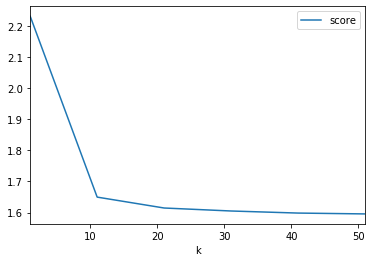

In [79]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

Neither Knn-Regression nor Linear Regression actually add anything much better than a Null Prediction at this stage.
This makes me assume I should move on with Decision Tree Modeling instead

### Decision Trees

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
treereg = DecisionTreeRegressor()
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
treereg = treereg.fit(X_train, y_train)

In [82]:
y_pred = treereg.predict(X_test)

In [83]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.8736932020071908

The RMSE score is still really bad. Time to introduce NLP

In [84]:
# Next lets have a look at the Reviews.

hotels_reviews = hotels[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]

In [85]:
hotels_reviews.head()

,Negative_Review,Positive_Review,Reviewer_Score
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,No Negative,No real complaints the hotel was great great ...,7.5
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7


In [86]:
type(hotels_reviews.Negative_Review[0])

str

In [87]:
hotels_reviews.Positive_Review[0]

' Only the park outside of the hotel was beautiful '

In [88]:
# The next step would be to do some modelling on Positive and Negative review effects on Review Score individually 
# using the Count Vectorizer. This would allow us to know if Reviews have an effect on the Score

In [89]:
hotels_positive = hotels[['Positive_Review', 'Reviewer_Score']]

In [90]:
hotels_positive.shape

(466868, 2)

In [91]:

X = hotels_positive.Positive_Review
y = hotels_positive.Reviewer_Score


In [92]:
X.shape

(466868,)

In [93]:
y.shape

(466868,)

In [94]:
type(y)

pandas.core.series.Series

In [95]:
# Create a Test Train Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [96]:
X_train.head(10)

404596     Fine hotel in reasonable area handy for train...
467221                                 Extra comfort of bed
127092     The service from staff was great Welcome drin...
20318      The beds are so comfy rooms have everything y...
321357     The staff were all incredibly attentive and h...
461280     The location was centrally located and near b...
9088                            Location and access to Tube
110169     the staff were amazing very friendly very hel...
39813      Bed was comfy and lounge area great for waiti...
279615               The breakfast was good and that was iT
Name: Positive_Review, dtype: object

In [97]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [98]:
X_train_dtm.shape

(350151, 40952)

In [99]:
X_test_dtm.shape

(116717, 40952)

In [100]:
# First 50 features
print((vect.get_feature_names()[50:]))

['0d', '0f', '0k', '0m', '0nly', '0people', '10', '100', '1000', '10000', '1000m', '1001', '1002', '1005', '100cm', '100euros', '100ft', '100m', '100mb', '100meter', '100mnice', '100mtrs', '100mts', '100per', '100x100', '100yards', '100yds', '101', '1016', '102', '102015', '1021', '1023', '1024', '1027', '103', '1030', '1030am', '1037', '104', '1045', '1049', '105', '1050pm', '105cm', '106', '107', '107eur', '108', '109', '10am', '10e', '10eu', '10eur', '10euro', '10euros', '10h00', '10h20', '10instead', '10ish', '10k', '10kms', '10m', '10m2', '10mbit', '10mbps', '10mimutes', '10min', '10minites', '10mins', '10mintues', '10mintus', '10minut', '10minute', '10minutes', '10minuts', '10mn', '10mns', '10no', '10out', '10out10', '10p', '10pm', '10pnds', '10pp', '10secs', '10th', '10thwedding', '10times', '10x', '10yr', '11', '110', '1101', '1102', '1103', '1104', '1106', '1108', '110v', '111', '1110', '1114', '1118', '1119', '112', '1121', '1123', '1127', '112eur', '112room', '113', '1130', 

In [101]:
vect.vocabulary_

{'fine': 15244,
 'hotel': 18674,
 'in': 19250,
 'reasonable': 29865,
 'area': 3525,
 'handy': 17731,
 'for': 15672,
 'train': 37482,
 'station': 34859,
 'overpriced': 26682,
 'and': 2967,
 'bit': 5533,
 'souless': 34089,
 'extra': 14515,
 'comfort': 8850,
 'of': 25981,
 'bed': 5025,
 'the': 36606,
 'service': 32767,
 'from': 16102,
 'staff': 34651,
 'was': 39677,
 'great': 17246,
 'welcome': 39894,
 'drink': 12361,
 'on': 26170,
 'arrival': 3656,
 'help': 18098,
 'with': 40327,
 'luggage': 22507,
 'chance': 7668,
 'to': 37095,
 'leave': 21491,
 'bags': 4472,
 'at': 3881,
 'due': 12467,
 'room': 31487,
 'not': 25640,
 'being': 5138,
 'ready': 29804,
 'helpful': 18117,
 'beds': 5054,
 'are': 3524,
 'so': 33870,
 'comfy': 8915,
 'rooms': 31520,
 'have': 17906,
 'everything': 13965,
 'you': 40764,
 'need': 25123,
 'is': 19977,
 'were': 39947,
 'all': 2535,
 'incredibly': 19367,
 'attentive': 4043,
 'location': 22115,
 'centrally': 7527,
 'located': 22089,
 'near': 25072,
 'by': 6783,
 'var

In [102]:
treereg = treereg.fit(X_train_dtm, y_train)
y_pred = treereg.predict(X_test_dtm)

In [103]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.667855024127114

In [104]:
# This has a remarkable improvement on just the Review. Adding this to the initial feature columns should improve.

In [105]:
hotels_negative = hotels[['Negative_Review', 'Reviewer_Score']]

X = hotels_negative.Negative_Review
y = hotels_negative.Reviewer_Score

# Create a Test Train Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

treereg = treereg.fit(X_train_dtm, y_train)
y_pred = treereg.predict(X_test_dtm)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.6162666613972911

In [106]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.6162666613972911

In [107]:
# This has a remarkable improvement on just the Review. Adding this to the initial feature columns should improve.

In [108]:
# Simply add them together as they already have a space at the start and end.
hotels['Review'] = hotels['Negative_Review'] + hotels["Positive_Review"]

In [109]:
hotels['Review'].head()

0     I am so angry that i made this post available...
1    No Negative No real complaints the hotel was g...
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: Review, dtype: object

In [110]:
hotels_reviews.Positive_Review[0]

' Only the park outside of the hotel was beautiful '

In [111]:
hotels_reviews.Negative_Review[0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [112]:
hotels['Review'][0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [113]:
X = hotels.Review
y = hotels.Reviewer_Score

In [115]:
# Create a Test Train Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [116]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer(stop_words = 'english', min_df = 2)

In [117]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [118]:
X_train_dtm.shape

(350151, 31986)

In [119]:
treereg = treereg.fit(X_train_dtm, y_train)
y_pred = treereg.predict(X_test_dtm)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.6528207081912756

The Next step would be to combine the two data frames appropriately and use a combination of the features for prediction.